In [266]:
import re
import nltk
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import cess_esp
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from collections import Counter

nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('cess_esp')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')


def leer_texto(archivo):
    
    """ontiene un string con el texto completro de un archivo

    Returns:
        _string_: 
        string: texto de un archivos
    """

    text = ''

    while(True):
        linea = archivo.readline()
        text = text+linea
        if not linea:
            break
    
    archivo.close
    
    return text

def depurar_texto(token_texto):
    """A partir de una lista de tokens con cadenas de texto
       crea un nuevo texto solo con aquellos tokens de caracteres
       para ello se aplica la validación isalpha()

    Args:
        token_texto (_list_): lista de tokens con palabras

    Returns:
        string: texto depurado solo con caracteres validos.
    """
    
    texto_depurado = ''
    for palabra in token_texto:
        if palabra.isalpha():
            texto_depurado = texto_depurado+' '+palabra
    
    return texto_depurado

sns.set_theme(style="white", context="talk")
    

[nltk_data] Downloading package words to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package cess_esp to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fredericksalazar/nltk_d

# Limpieza General de datos

se realizará un limpieza general de los archivos a procesar con base en las siguientes reglas definidas:

- todo estará en minusculas
- se reemplazará caracter - por vacio
- se eliman los saltos de linea \n por vacio


In [217]:
path_petro = './archivos/petro.pdf.txt'
path_fajardo = './archivos/fajardo.pdf.txt'

archivo_petro = open(path_petro, 'r', encoding='utf8')
archivo_fajardo = open(path_fajardo, 'r', encoding='utf8')

texto_petro = leer_texto(archivo_petro)
texto_fajardo = leer_texto(archivo_fajardo)

In [218]:
#Reemplazamos caracteres incomodos que son usados en el texto, convertimos todo a minusculas para mejor procesamiento

texto_petro = texto_petro.lower()
texto_fajardo = texto_fajardo.lower()


# Tokenización

Como paso fundamental en el NLP la tokenización nos permite tomar un texto entero y dividirlo en cada una de las palabras que lo componen, esta división permitirá posteriormente entender las palabras usadas.

In [222]:
#hacemos uso del modulo word_tokenize de nltk para separar cada una de las palabras usadas

token_petro = word_tokenize(texto_petro)
token_fajardo = word_tokenize(texto_fajardo)

len_token_petro = len(token_petro)
len_token_fajardo = len(token_fajardo)


In [223]:
print('total palabras usadas en documento petro: ', len_token_petro)
print('total palabras usadas en documento fajardo: ', len_token_fajardo)

total palabras usadas en documento petro:  28806
total palabras usadas en documento fajardo:  25038


# Texto Depurado

Se creará un nuevo texto totalmente depurado en el cual se eliminan caracteres especiales, signos de puntuacion, numeros entro otros.

In [226]:

texto_petro_depurado = depurar_texto(token_petro)
texto_fajardo_depurado = depurar_texto(token_fajardo)

#volvemos a calcular los tokens de cada texto

token_petro = word_tokenize(texto_petro_depurado)
token_fajardo = word_tokenize(texto_fajardo_depurado)

print('total nuevos tokens petro: ', len(token_petro))
print('total nuevos tokens fajardo: ', len(token_fajardo))


total nuevos tokens petro:  26146
total nuevos tokens fajardo:  13247


In [227]:
#vamos a evidenciar la cantidad total de palabras en cada uno de los textos 

dict_len_textos = {'texto_petro': len_token_petro,
                   'texto_fajardo': len_token_fajardo}

dict_len_items = dict_len_textos.items()

df_lenght_textos = pd.DataFrame(list(dict_len_items))
df_lenght_textos.columns=['texto', 'total']
df_lenght_textos

,texto,total
0,texto_petro,28806
1,texto_fajardo,25038


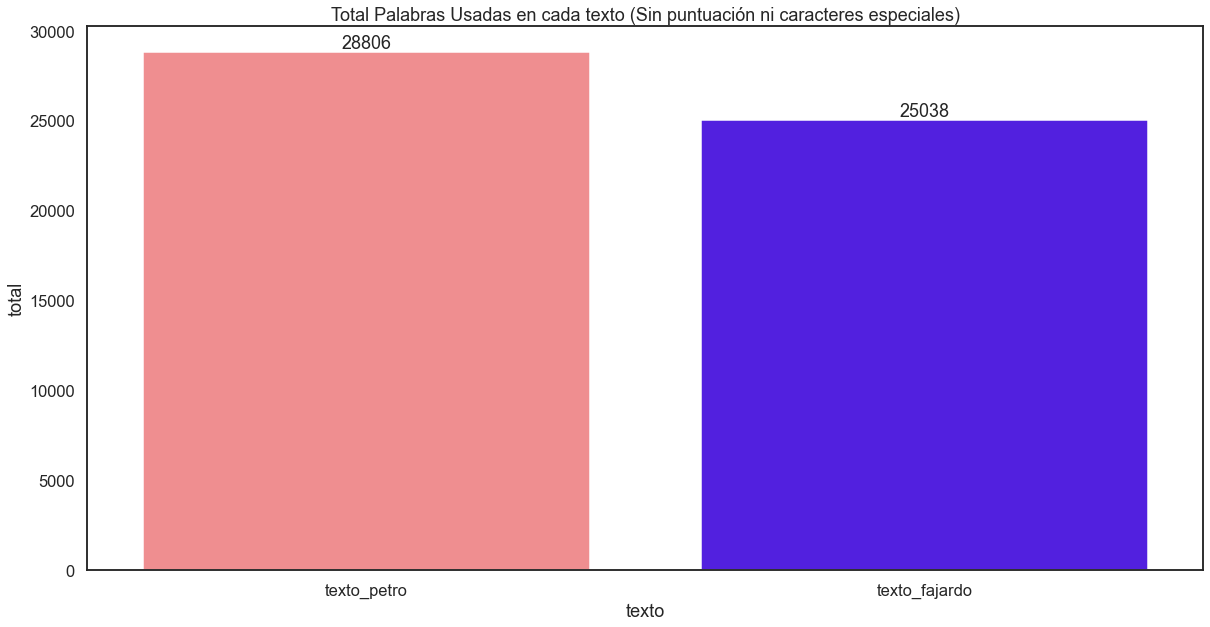

In [228]:
plt.figure(figsize=(20,10))
plt.title('Total Palabras Usadas en cada texto (Sin puntuación ni caracteres especiales)')

ax = sns.barplot(data=df_lenght_textos,
                 x='texto', 
                 y='total',
                 palette='gnuplot2_r')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

# Eliminando Stop Words

Vamos a quitar las stop words que no aportan valor al texto 

In [229]:
es_stop_words = stopwords.words('spanish')

print(len(es_stop_words))

313


In [236]:
es_stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [234]:
#Creamos una lista de palabras eliminando las palabras stop word del español de los textos

lis_palabras_petro_stp = [words for words in token_petro if words not in es_stop_words]
lis_palabras_fajardo_stp = [words for words in token_fajardo if words not in es_stop_words]

#obtenemos el tamaño de la lista de palabras 
len_wstp_petro = len(lis_palabras_petro_stp)
len_wstp_fajardo = len(lis_palabras_fajardo_stp)

print('total palabras petro sin stopwords: ',len(lis_palabras_petro_stp))
print('total palabras petro sin stopwords: ',len(lis_palabras_fajardo_stp))

#se crea diccionario con los resultados
dict_len_wstp_textos = {'texto_petro': len_wstp_petro,
                        'texto_fajardo': len_wstp_fajardo}

dict_len_items_wstp = dict_len_wstp_textos.items()

#crea pandas DataFrame con los valores obtenidos
df_lenght_textos_wstp = pd.DataFrame(list(dict_len_items_wstp))
df_lenght_textos_wstp.columns=['texto_wstp', 'total_wstp']
df_lenght_textos_wstp

total palabras petro sin stopwords:  13732
total palabras petro sin stopwords:  7184


,texto_wstp,total_wstp
0,texto_petro,13732
1,texto_fajardo,7184


In [258]:
#vamos a crear un dataframe total con los datos de total palabras inicicales y total palabras sin stopwords

df_diff_len_textos = df_lenght_textos.merge(df_lenght_textos_wstp, left_on='texto', right_on='texto_wstp', how='inner')
df_diff_len_textos = df_diff_len_textos.drop(['texto_wstp'], axis=1)

df_diff_len_textos['total palabras stopwords'] = (df_diff_len_textos['total']-df_diff_len_textos['total_wstp'])
df_diff_len_textos['% palabras con valor'] = df_diff_len_textos['total_wstp']/df_diff_len_textos['total']*100
df_diff_len_textos['% palabras con stopwords'] = df_diff_len_textos['total palabras stopwords']/df_diff_len_textos['total']*100

df_diff_len_textos.columns =['texto',
                             'total palabras usadas',
                             'total palabras sin stopwords',
                             'total palabras stopwords',
                             '% palabras con valor',
                             '% palabras sin valor']

df_diff_len_textos

,texto,total palabras usadas,total palabras sin stopwords,total palabras stopwords,% palabras con valor,% palabras sin valor
0,texto_petro,28806,13732,15074,47.670624,52.329376
1,texto_fajardo,25038,7184,17854,28.692388,71.307612


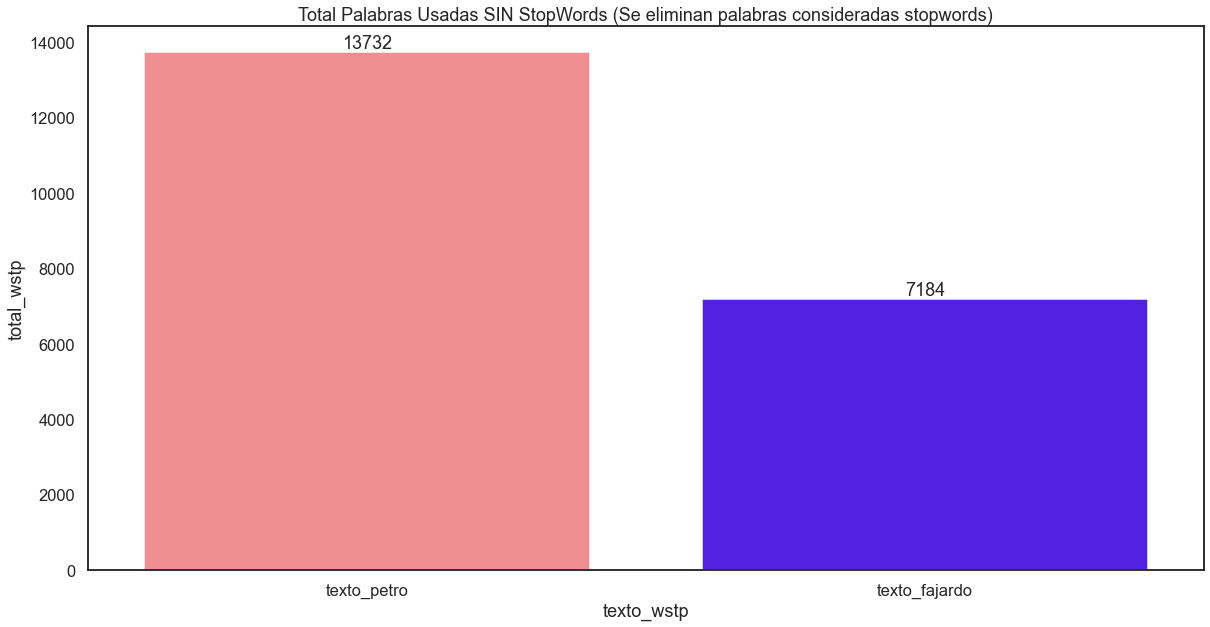

In [235]:
plt.figure(figsize=(20,10))
plt.title('Total Palabras Usadas SIN StopWords (Se eliminan palabras consideradas stopwords)')

ax = sns.barplot(data=df_lenght_textos_wstp,
                 x='texto_wstp', 
                 y='total_wstp',
                 palette='gnuplot2_r')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

<AxesSubplot:xlabel='texto'>

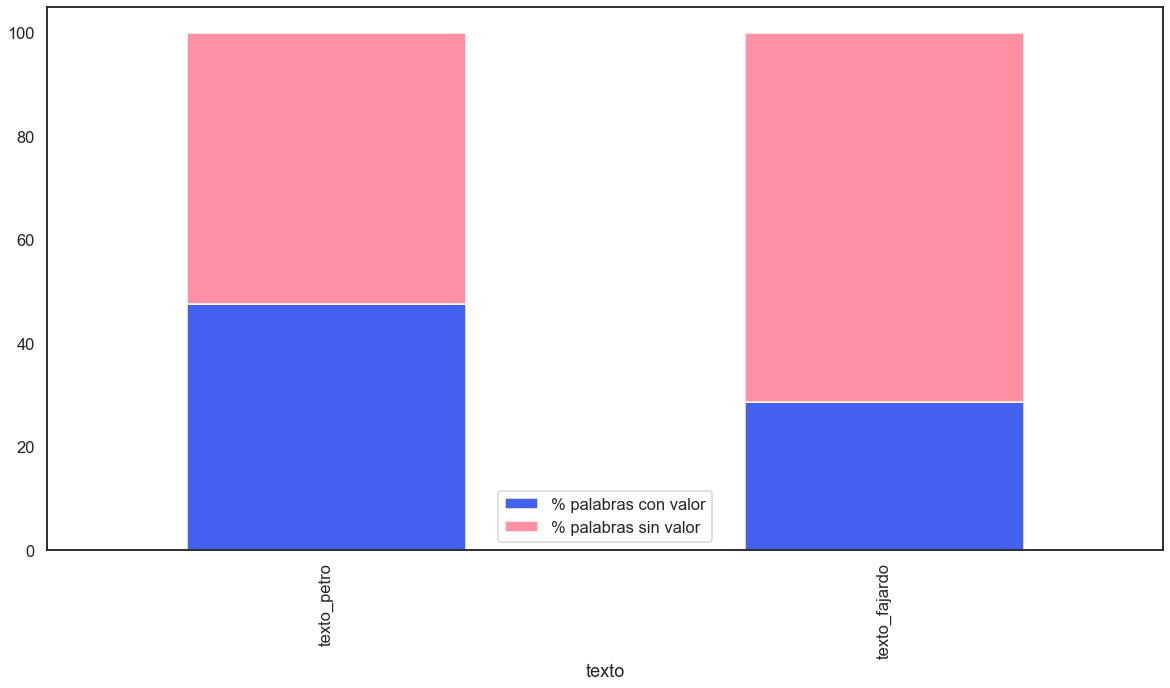

In [296]:
#cremos un grafico que muestre la distribucion de palabras en cada texto 

df_diff_len_textos.plot.bar(x='texto',
                            y=['% palabras con valor', '% palabras sin valor'],
                            stacked = True,
                            figsize=(20,10),
                            color=["#4361ee", "#ff8fa3"])



In [237]:
df_lenght_textos

,texto,total
0,texto_petro,28806
1,texto_fajardo,25038


In [238]:
df_lenght_textos_wstp

,texto_wstp,total_wstp
0,texto_petro,13732
1,texto_fajardo,7184


In [257]:
#vamos a crear un dataframe total con los datos de total palabras inicicales y total palabras sin stopwords

df_diff_len_textos = df_lenght_textos.merge(df_lenght_textos_wstp, left_on='texto', right_on='texto_wstp', how='inner')
df_diff_len_textos = df_diff_len_textos.drop(['texto_wstp'], axis=1)

df_diff_len_textos['total palabras stopwords'] = (df_diff_len_textos['total']-df_diff_len_textos['total_wstp'])
df_diff_len_textos['% palabras con valor'] = df_diff_len_textos['total_wstp']/df_diff_len_textos['total']*100
df_diff_len_textos['% palabras con stopwords'] = df_diff_len_textos['total palabras stopwords']/df_diff_len_textos['total']*100

df_diff_len_textos.columns =['texto',
                             'total palabras usadas',
                             'total palabras sin stopwords',
                             'total palabras stopwords',
                             '% palabras con valor',
                             '% palabras sin valor']

df_diff_len_textos

,texto,total palabras usadas,total palabras sin stopwords,total palabras stopwords,% palabras con valor,% palabras sin valor
0,texto_petro,28806,13732,15074,47.670624,52.329376
1,texto_fajardo,25038,7184,17854,28.692388,71.307612


# Contador de palabras

Procedemos a contar cada una de las palabras que existen dentro de la lista de palabras final.

In [129]:
contador = Counter(lista_palabras)

In [130]:
contador.most_common(30)

[('sistema', 103),
 ('vida', 92),
 ('economía', 85),
 ('nacional', 85),
 ('salud', 73),
 ('mujeres', 71),
 ('derechos', 70),
 ('social', 66),
 ('trabajo', 62),
 ('colombia', 61),
 ('protección', 61),
 ('política', 59),
 ('paz', 56),
 ('país', 54),
 ('acceso', 53),
 ('hacia', 48),
 ('derecho', 48),
 ('así', 46),
 ('cambio', 45),
 ('condiciones', 44),
 ('cuidado', 44),
 ('educación', 44),
 ('sociedad', 42),
 ('productiva', 41),
 ('desarrollo', 39),
 ('participación', 38),
 ('cultura', 38),
 ('gobierno', 38),
 ('construcción', 37),
 ('personas', 37)]

# etiquetado de palabras

en el caso del etiquetado hemos usado el postagger por defecto encontrando problemas dado que soporta mejor el ingles, en este caso vamos a usar un nuevo etiquetador que es Stanford que si soporta el idioma el español.

vamos a aplicar una técnica de etiquetado al texto de plan de gobierno a fin de comprender el uso de las diferentes palabras y que tipo son:

- JJ -> Adjetivos
- NN -> Sustantivos
- RB -> Adverbios
- PRP -> Pronombres
- VB -> Verbos

In [136]:
taged_esp = cess_esp.tagged_sents()

taged_esp

[[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')], [('Una', 'di0fs0'), ('portavoz', 'nccs000'), ('de', 'sps00'), ('EDF', 'np00000'), ('explicó', 'vmis3s0'), ('a', 'sps00'), ('EFE', 'np00000'), ('que', 'c

In [131]:
lista_palabras_tag = nltk.pos_tag(lista_palabras)

lista_palabras_tag

[('colombia', 'NN'),
 ('potencia', 'VBZ'),
 ('mundial', 'JJ'),
 ('vidallegó', 'NN'),
 ('hora', 'NN'),
 ('cambiar', 'NN'),
 ('colombia', 'NN'),
 ('potencia', 'VBP'),
 ('mundial', 'JJ'),
 ('vida', 'NN'),
 ('mediante', 'NN'),
 ('pacto', 'NN'),
 ('histórico', 'NN'),
 ('manera', 'NN'),
 ('urgente', 'JJ'),
 ('concrete', 'JJ'),
 ('nuevo', 'NN'),
 ('contrato', 'NN'),
 ('social', 'JJ'),
 ('buen', 'NN'),
 ('vivir', 'NN'),
 ('vivir', 'NN'),
 ('sabroso', 'NN'),
 ('todas', 'NN'),
 ('diversidades', 'NNS'),
 ('nación', 'VBP'),
 ('entrar', 'JJ'),
 ('fin', 'NN'),
 ('paz', 'NN'),
 ('cuyo', 'NN'),
 ('rostro', 'NN'),
 ('democracia', 'NN'),
 ('multicolor', 'NN'),
 ('expresión', 'NN'),
 ('mandatos', 'NN'),
 ('ciudadanos', 'NN'),
 ('haga', 'NN'),
 ('realidad', 'NN'),
 ('igualdad', 'NN'),
 ('economía', 'NN'),
 ('productiva', 'NN'),
 ('genere', 'RB'),
 ('riqueza', 'VBZ'),
 ('basada', 'JJ'),
 ('trabajo', 'NN'),
 ('protección', 'NN'),
 ('casa', 'NN'),
 ('común', 'NN'),
 ('programa', 'NN'),
 ('cambio', 'NN'),
 ('

In [112]:
ne_palabras = nltk.ne_chunk(lista_palabras_tag)

print(ne_palabras)

(S
  colombia/JJ
  potenciamundial/JJ
  vidallegó/NN
  hora/NN
  cambiar/NN
  colombia/NN
  potencia/VBP
  mundial/JJ
  vida/NN
  mediante/NN
  pacto/NN
  histórico/NN
  manera/NN
  urgente/JJ
  concrete/JJ
  nuevo/NN
  contrato/NN
  social/JJ
  buen/NN
  vivir/NN
  vivir/NN
  sabroso/NN
  todas/NN
  diversidades/NNS
  nación/VBP
  entrar/JJ
  fin/NN
  paz/NN
  cuyo/NN
  rostro/NN
  democracia/NN
  multicolor/NN
  expresión/NN
  mandatos/NN
  ciudadanos/NN
  haga/NN
  realidad/NN
  igualdad/NN
  economía/NN
  productiva/NN
  genere/RB
  riqueza/VBZ
  basada/JJ
  trabajo/NN
  protección/NN
  casa/NN
  común/NN
  programa/NN
  cambio/NN
  construido/NN
  territorios/NNS
  voces/NNS
  gentes/NNS
  concebido/VBP
  inicio/JJ
  transición/NN
  inmediato/NN
  hará/NN
  posible/JJ
  vida/NN
  digna/NN
  superación/NN
  violencia/NN
  justicia/NN
  social/JJ
  climática/NN
  tiempo/JJ
  consolidan/NN
  condiciones/NNS
  permanentes/VBZ
  paz/JJ
  grande/NN
  permita/NN
  toda/NN
  sociedad/NN
 